In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("/content/new_dataset.csv")
df.head()

,Unnamed: 0,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE,BRANCH CODE
0,1,BC,5,3.0,200.00,1,CS
1,2,SC,7,1.0,200.00,1,CS
2,3,BC,8,4.0,200.00,1,CS
3,4,BC,10,6.0,200.00,1,EC
4,6,OC,12,8.0,199.75,1,EE


In [6]:
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['BRANCH CODE'],axis=1)

In [7]:
dfc1 = df.loc[df['COLLEGE CODE'] == 1]
dfc2 = df.loc[df['COLLEGE CODE'] == 0]
dfc2 = dfc2.sample(frac = 1)
dfc2 = dfc2.head(4500)
df = pd.concat([dfc1,dfc2], axis=0)
df = df.sample(frac = 1)

In [8]:
community = {'BC':1,'SC':2,'OC':3,'BCM':4,'MBC':5,'SCA':6,'ST':7,'MBC/DNC':5,'MBCV':5,'MBCDNC':5}
df.COMMUNITY = [community[item] for item in df.COMMUNITY]

#**Data Visualization**
##Univariate Analysis

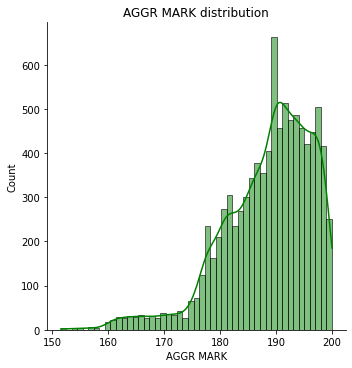

In [9]:
sns.displot(x=df["AGGR MARK"], kde=True, color='green')
plt.title("AGGR MARK distribution");

##Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


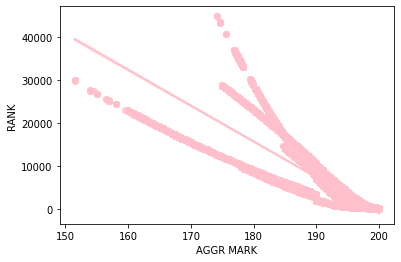

In [10]:
sns.regplot(df['AGGR MARK'],df['RANK'],color='pink')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


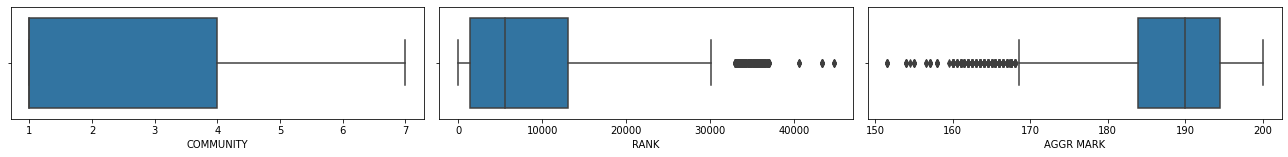

In [11]:
all_columns = ['COMMUNITY', 'RANK', 'AGGR MARK','COM.RANK','COLLEGE CODE']
target = 'COLLEGE CODE'
columns = ['COMMUNITY', 'RANK', 'AGGR MARK','COM.RANK']
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(hspace=1)

for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[columns[i]])
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


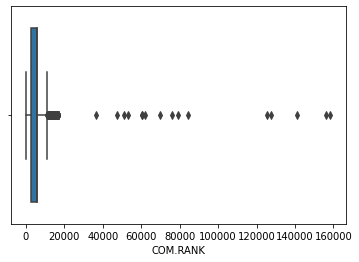

In [12]:
sns.boxplot(df['COM.RANK'])

##Multi-Variate Analysis

In [13]:
dfs = df.sort_values(['RANK','AGGR MARK'],ascending=[True,False])

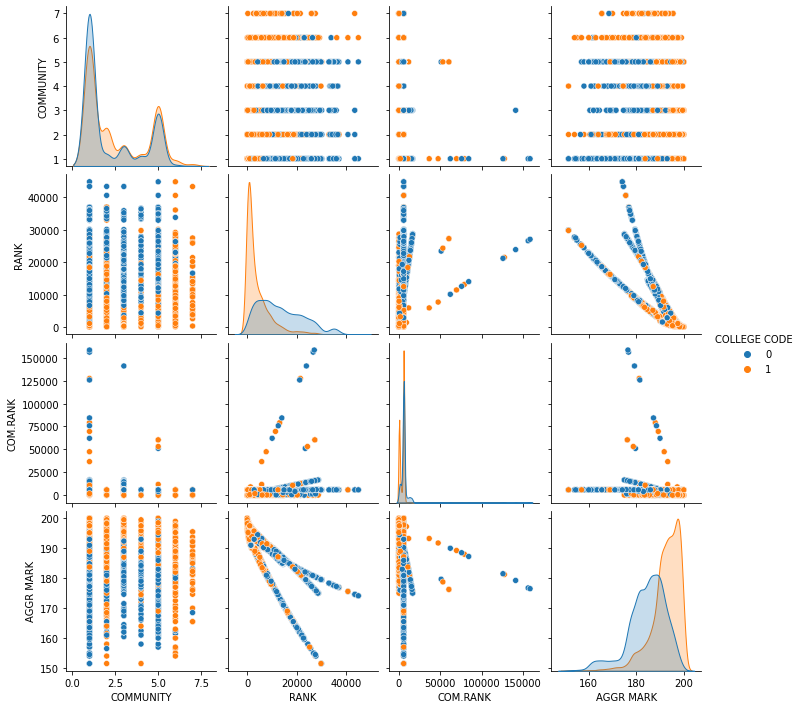

In [15]:
sns.pairplot(df,hue='COLLEGE CODE')

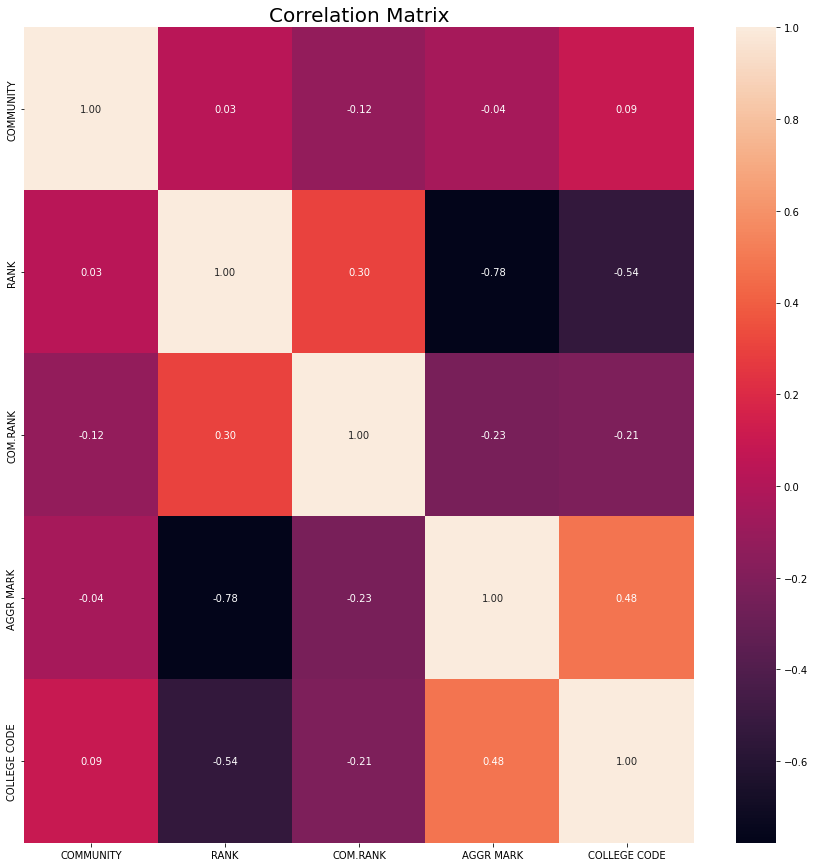

In [16]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()